<a href="https://colab.research.google.com/github/mapmatters/coursera-nlp/blob/main/nlp_class_1_Week3_nb02_manipulating_word_embedding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir('/content/drive/MyDrive/coursera/nlp')
!ls

Mounted at /content/drive
 data
'nlp class 1 - Week1 - nb01'
'nlp class 1 - Week1 - nb02'
'nlp class 1 - Week1 - nb03'
'nlp class 1 - Week1 - nb04 - assignment'
'nlp class 1 - Week2 - nb01'
'nlp class 1 - Week2 - nb02 - assignment'
'nlp class 1 - Week3 - nb01 - linear algebra'
'nlp class 1 - Week3 - nb02- manipulating word embedding'
 py
 __pycache__


In [2]:
import pandas as pd # Library for Dataframes 
import numpy as np # Library for math functions
import pickle # Python object serialization library. Not secure

word_embeddings = pickle.load( open( "data/word_embeddings_subset.p", "rb" ) )
len(word_embeddings) # there should be 243 words that will be used in this assignment

243

In [5]:
countryVector = word_embeddings['country'] # Get the vector representation for the word 'country'
print(type(countryVector)) # Print the type of the vector. Note it is a numpy array
print(f'length of vector {len(countryVector)}')
print(countryVector) # Print the values of the vector.  

<class 'numpy.ndarray'>
length of vector 300
[-0.08007812  0.13378906  0.14355469  0.09472656 -0.04736328 -0.02355957
 -0.00854492 -0.18652344  0.04589844 -0.08154297 -0.03442383 -0.11621094
  0.21777344 -0.10351562 -0.06689453  0.15332031 -0.19335938  0.26367188
 -0.13671875 -0.05566406  0.07470703 -0.00070953  0.09375    -0.14453125
  0.04296875 -0.01916504 -0.22558594 -0.12695312 -0.0168457   0.05224609
  0.0625     -0.1484375  -0.01965332  0.17578125  0.10644531 -0.04760742
 -0.10253906 -0.28515625  0.10351562  0.20800781 -0.07617188 -0.04345703
  0.08642578  0.08740234  0.11767578  0.20996094 -0.07275391  0.1640625
 -0.01135254  0.0025177   0.05810547 -0.03222656  0.06884766  0.046875
  0.10107422  0.02148438 -0.16210938  0.07128906 -0.16210938  0.05981445
  0.05102539 -0.05566406  0.06787109 -0.03759766  0.04345703 -0.03173828
 -0.03417969 -0.01116943  0.06201172 -0.08007812 -0.14941406  0.11914062
  0.02575684  0.00302124  0.04711914 -0.17773438  0.04101562  0.05541992
  0.00598

In [6]:
#Get the vector for a given word:
def vec(w):
    return word_embeddings[w]

# Operating on word embeddings

In [26]:
import matplotlib.pyplot as plt

words = ['oil', 'gas', 'happy', 'sad', 'city', 'town', 'village', 'country', 'continent', 'petroleum', 'joyful']

bag2d = np.array([vec(word) for word in words])
print(bag2d[:,:])
print(bag2d[:, 0])

[[-0.13964844  0.06225586 -0.27929688 ...  0.20410156  0.23535156
  -0.05102539]
 [-0.16113281  0.10546875 -0.13867188 ...  0.25585938  0.20214844
  -0.01928711]
 [-0.0005188   0.16015625  0.0016098  ... -0.03540039  0.08886719
  -0.30273438]
 ...
 [ 0.02978516  0.25585938  0.23925781 ... -0.06030273  0.19726562
  -0.2734375 ]
 [-0.11865234  0.19921875 -0.22265625 ...  0.09960938  0.20605469
  -0.09912109]
 [ 0.18066406 -0.0090332   0.12988281 ... -0.33984375  0.2734375
   0.04492188]]
[-0.13964844 -0.16113281 -0.0005188   0.18945312 -0.0100708   0.12353516
  0.14746094 -0.08007812  0.02978516 -0.11865234  0.18066406]


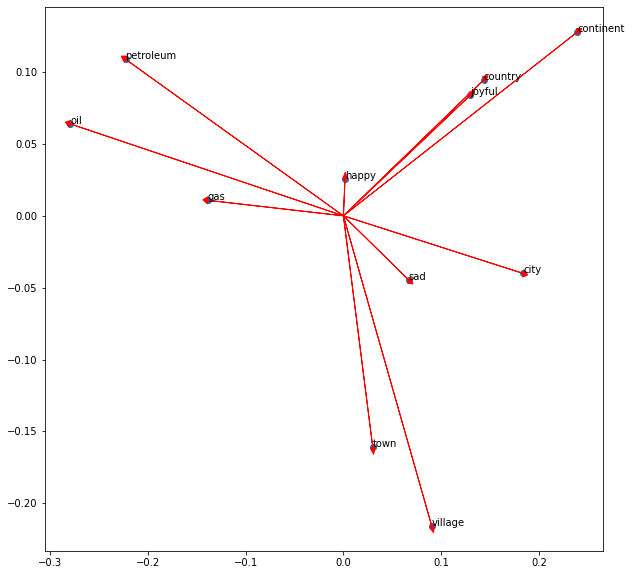

In [27]:
fig, ax = plt.subplots(figsize = (10, 10))

col1 = 2
col2 = 3

# print an arrow for each word
for word in bag2d:
  ax.arrow(0,0, word[col1], word[col2], head_width=0.005, head_length=0.005, fc='r', ec='r', width=1e-5)

ax.scatter(bag2d[:, col1], bag2d[:, col2]) # plot a dot for each word

for i in range(0, len(words)):
  ax.annotate(words[i], (bag2d[i, col1], bag2d[i, col2]))

plt.show()

# Word distance

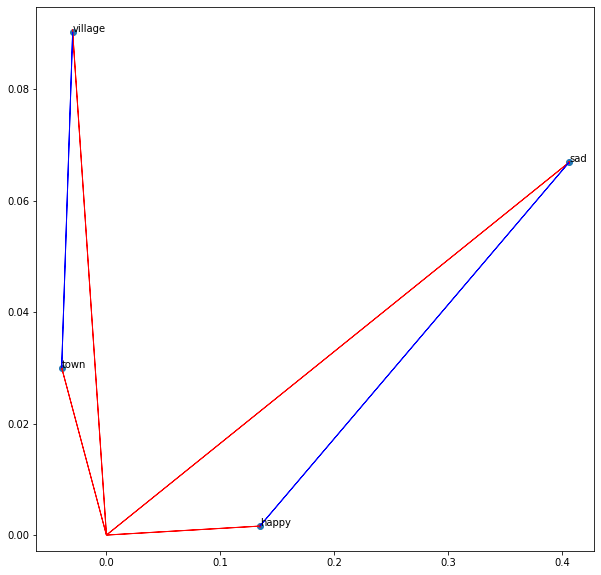

In [30]:
words = ['sad', 'happy', 'town', 'village']

bag2d = np.array([vec(word) for word in words])

fig, ax = plt.subplots(figsize = (10,10))

col1 = 8
col2 = 2

for word in bag2d:
  ax.arrow(0,0, word[col1], word[col2], head_width=0.0005, head_length=0.0005, fc='r', ec='r', width=1e-5)

# print the vector difference between village and town
village = vec('village')
town = vec('town')
diff = town - village
ax.arrow(village[col1], village[col2], diff[col1], diff[col2], fc='b', ec='b', width=1e-5)

# print the vector difference sad and happy
happy = vec('happy')
sad = vec('sad')
diff = happy - sad
ax.arrow(sad[col1], sad[col2], diff[col1], diff[col2], fc='b', ec='b', width=1e-5)

ax.scatter(bag2d[:, col1], bag2d[:, col2])

# add the word label
for i in range(0, len(words)):
  ax.annotate(words[i], (bag2d[i,col1], bag2d[i, col2]))

plt.show()


# Linear algebra on word embedding

In [31]:
# norm
print(np.linalg.norm(vec('town')))
print(np.linalg.norm(vec('sad')))

2.3858097
2.9004838


# Predicting capitals

In [32]:
capital = vec('France') - vec('Paris')
country = vec('Madrid') + capital

print(country[0:5])

[-0.02905273 -0.2475586   0.53952026  0.20581055 -0.14862823]


In [33]:
# country로 저장한 값과 'Spain' 사이의 벡터 차이 보기
diff = country - vec('Spain')
print(diff[0:10])

[-0.06054688 -0.06494141  0.37643433  0.08129883 -0.13007355 -0.00952148
 -0.03417969 -0.00708008  0.09790039 -0.01867676]


In [91]:
# closest word
keys = word_embeddings.keys()
data = []
for key in keys:
  data.append(word_embeddings[key])
# print(keys)
# print(data[:2])

embedding = pd.DataFrame(data=data, index=keys)

def find_closest_word(v, k = 1):
  diff = v - data # data == embedding.values
  eu_dist = np.linalg.norm(diff, axis = 1)
  i = np.argmin(eu_dist)
  result = list(keys)[np.argmin(eu_dist)]
  return result, i


In [104]:
from_country_to_capital = vec('France') - vec('Paris')
from_capital_to_country = vec('Madrid') + from_country_to_capital
find_closest_word(from_capital_to_country)

('Spain', 22)

# Predicting Other Countries

In [112]:
keys

dict_keys(['country', 'city', 'China', 'Iraq', 'oil', 'town', 'Canada', 'London', 'England', 'Australia', 'Japan', 'Pakistan', 'Iran', 'gas', 'happy', 'Russia', 'Afghanistan', 'France', 'Germany', 'Georgia', 'Baghdad', 'village', 'Spain', 'Italy', 'Beijing', 'Jordan', 'Paris', 'Ireland', 'Turkey', 'Egypt', 'Lebanon', 'Taiwan', 'Tokyo', 'Nigeria', 'Vietnam', 'Moscow', 'Greece', 'Indonesia', 'sad', 'Syria', 'Thailand', 'Libya', 'Zimbabwe', 'Cuba', 'Ottawa', 'Tehran', 'Sudan', 'Kenya', 'Philippines', 'Sweden', 'Poland', 'Ukraine', 'Rome', 'Venezuela', 'Switzerland', 'Berlin', 'Bangladesh', 'Portugal', 'Ghana', 'Athens', 'king', 'Madrid', 'Somalia', 'Dublin', 'Qatar', 'Chile', 'Islamabad', 'Bahrain', 'Nepal', 'Norway', 'Serbia', 'Kabul', 'continent', 'Brussels', 'Belgium', 'Uganda', 'petroleum', 'Cairo', 'Denmark', 'Austria', 'Jamaica', 'Georgetown', 'Bangkok', 'Finland', 'Peru', 'Romania', 'Bulgaria', 'Hungary', 'Vienna', 'Kingston', 'Manila', 'Cyprus', 'Azerbaijan', 'Copenhagen', 'Fiji',

In [105]:
find_closest_word(vec('Italy') - vec('Rome') + vec('Madrid'))

('Spain', 22)

In [116]:
find_closest_word(vec('Tokyo') + from_country_to_capital)

('Japan', 10)

In [96]:
print(find_closest_word(vec('Berlin') + capital))
print(find_closest_word(vec('Beijing') + capital))

('Germany', 18)
('China', 2)


# Represent a sentence as a vector

In [ ]:
doc = "Spain petroleum city king"
vdoc = [vec(x) for x in doc.split(" ")]
doc2vec = np.sum(vdoc, axis=0)
print(vdoc)
print(doc2vec)

In [118]:
find_closest_word(doc2vec)

('petroleum', 76)

In [119]:
len(doc2vec)

300

In [122]:
len(vdoc)

4

In [123]:
type(vdoc)

list